In [1]:
SEED = 1
import random

import tellurium as te
import pandas as pd
import numpy as np
np.random.seed(SEED)

import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

import aesara.tensor as at
import aesara
floatX = aesara.config.floatX
import pymc as pm
import numpy as np

import cobra
import logging
logging.getLogger("cobra").setLevel(logging.ERROR)

import os

from scipy import stats
import scipy as sp
import math

import cloudpickle
import gzip

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
os.chdir('../..')
from src import antemll, util
import emll
from emll.aesara_utils import LeastSquaresSolve
os.chdir('notebooks/topologyC')

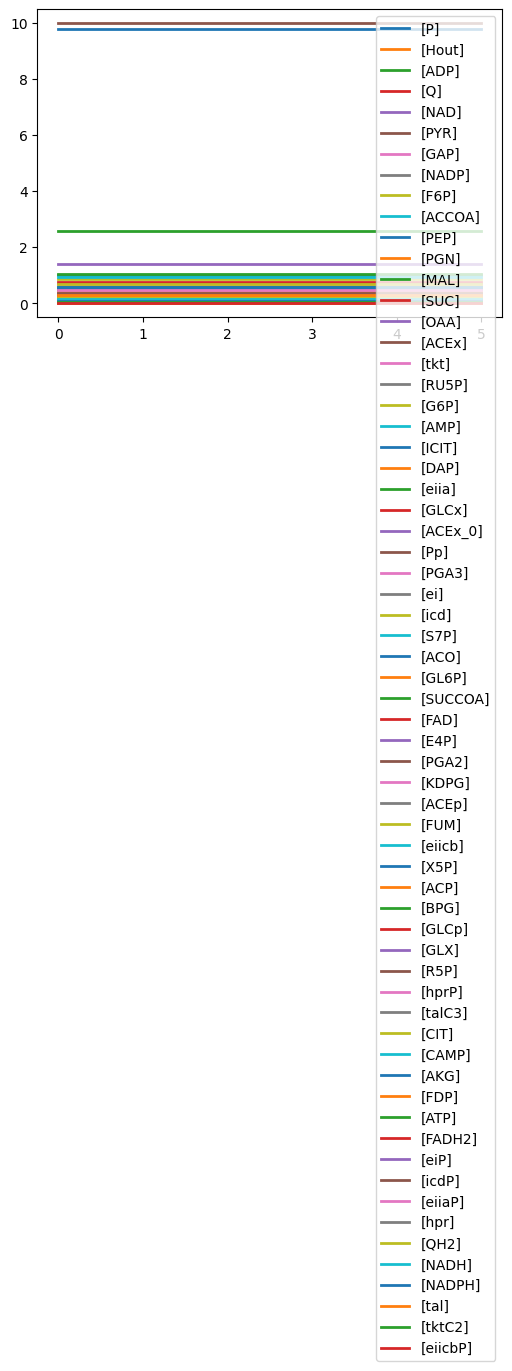

In [7]:
ant = '../../models/Antimony/TopologyC_1.ant'  
r = te.loada(ant)
r.conservedMoietyAnalysis = True
# r.steadyState()
r.simulate()
r.plot()

In [13]:
a[-1,1]

13.628581508901355

In [48]:
ant = '../../models/Antimony/TopologyC_1_noReg.ant'  
r = te.loada(ant)
r.conservedMoietyAnalysis = True
# r.steadyState()

In [31]:
np.where(r.rv() >1e-3)

(array([55, 61], dtype=int64),)

In [45]:
type(r.getReactionIds())

list

In [47]:
[r.getReactionIds()[i] for i in [55, 61]]

['vGLC_feed', 'vXCH_GLC']

(-0.01, 0.1)

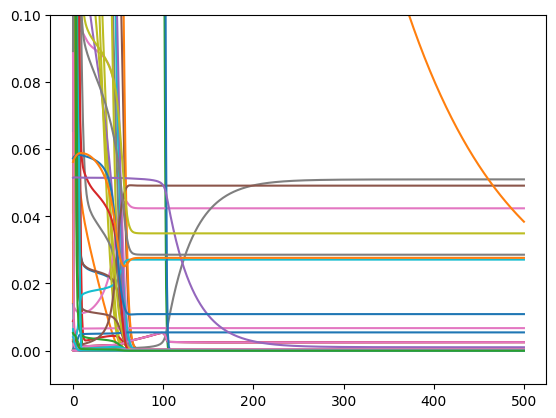

In [64]:
r = te.loada(ant)
r.conservedMoietyAnalysis = True
a = r.simulate(0, 500, 500)
# r.plot()
_ = plt.plot(a[:, 0], a[:, 1:])
plt.ylim(-0.01, 0.1)

In [68]:
pd.DataFrame(a[-1, 1:], index=r.getFloatingSpeciesIds()).T


,P,Hout,ADP,Q,NAD,PYR,GAP,NADP,F6P,ACCOA,...,eiiaP,icdP,QH2,eiicb,NADPH,NADH,eiP,talC3,tktC2,hprP
0,7.919157,0.00005,5.143774e-07,0.614179,1.535085,0.000395,4.804206e-12,0.228435,2.893042e-13,19.446768,...,4.048817e-12,0.001016,0.385821,0.00039,0.028565,0.034915,1.028084e-14,0.010884,0.027627,3.462161e-14


In [69]:
r.steadyState()

RuntimeError: Maximum iterations exceeded

In [72]:
np.where(abs(r.rv())>1e-6)

(array([46, 47, 48, 49, 55], dtype=int64),)

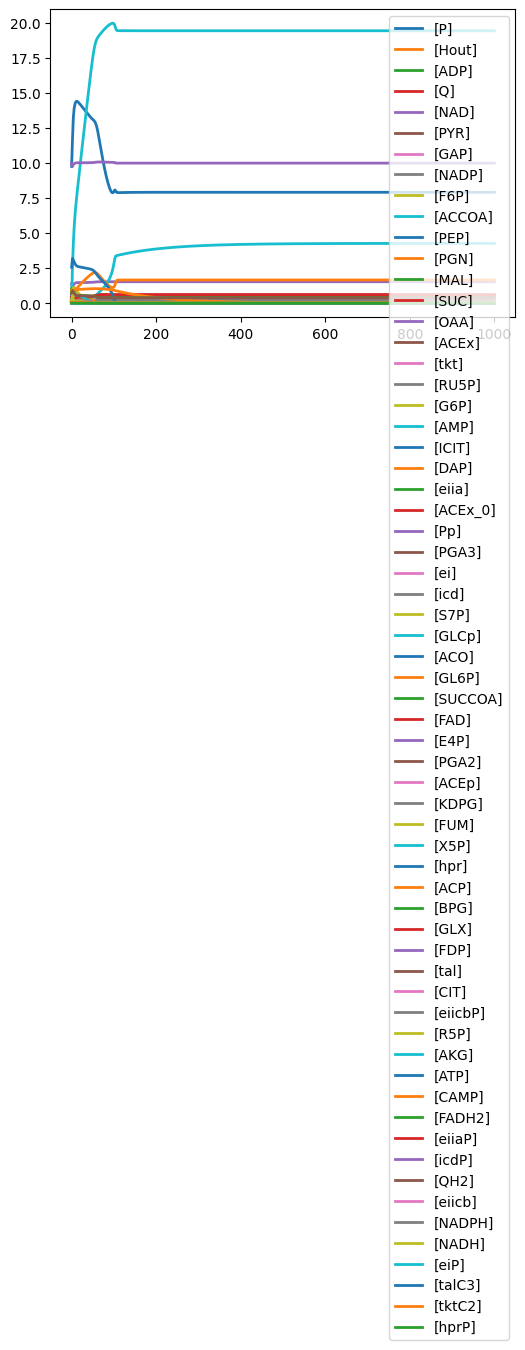

In [70]:
r = te.loada(ant)
r.conservedMoietyAnalysis = True

a = r.simulate(0, 1000, 500)# , ['time', 'GLCx'])
r.plot()


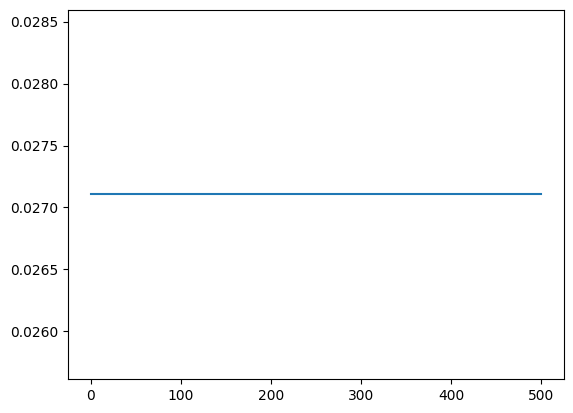

In [56]:
a[:, 2:]

[]